In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

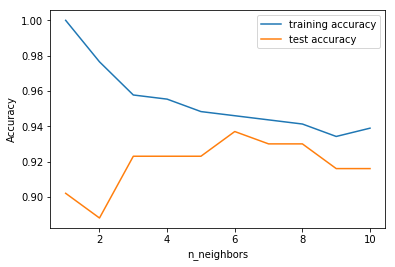

In [14]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


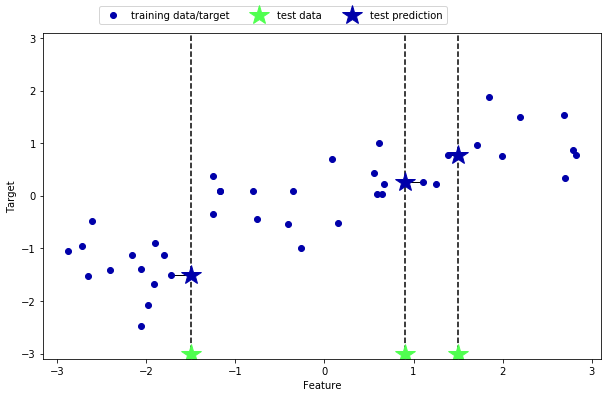

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

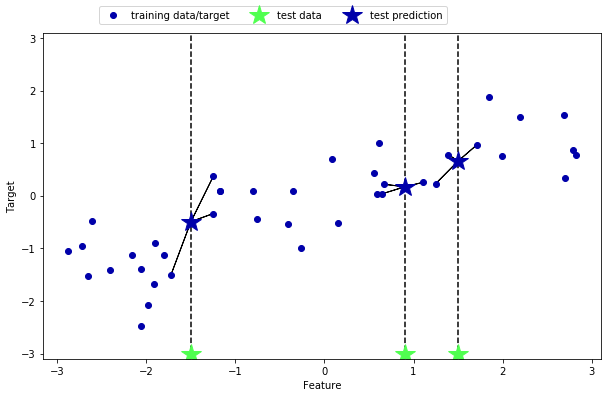

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

x,y = mglearn.datasets.make_wave(n_samples=40)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

print("Test set predictions: \n {}".format(reg.predict(x_test)))
print ("Test score: {}".format(reg.score(x_test,y_test)))

Test set predictions: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test score: 0.834417244625


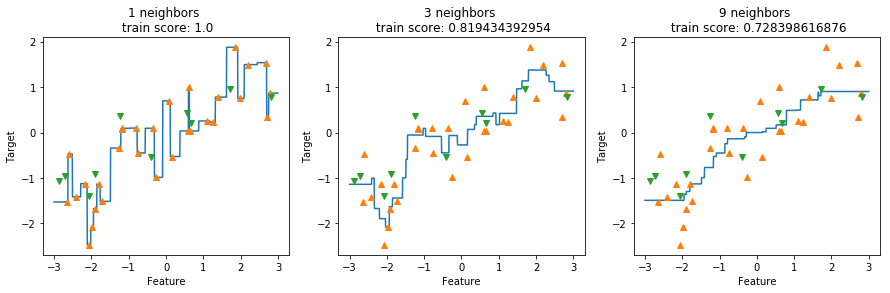

In [37]:
# Analyzing KNeighbors Regressor.

fig, axes = plt.subplots(1,3, figsize=(15,4))

# create 1000 data points evenly spaced between -3 and 3.
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    # Make predictions using 1,3,9 neighbors.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^')
    ax.plot(x_test, y_test, 'v')
    train_score = reg.score(x_train, y_train)
    test_score = reg.score(x_test, y_test) 
    
    ax.set_title("{} neighbors \n train score: {}".format(n_neighbors, train_score, test_score))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")    